In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertModel

In [ ]:
# Using a pre-trained language model

model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
len(model.encoder.layer)                                                        # Base BERT has 12 encoders in the encoder stack

12

In [ ]:
model.encoder.layer[0]

BertLayer(
  (attention): BertAttention(
    (self): BertSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

## 2.3 Multi-headed attention

In [ ]:
pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertModel, BertTokenizer
from bertviz import head_view
import torch
import pandas as pd

In [ ]:
# Let's load a vanilla BERT-base model.

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = "My friend told me about this class and i love it very much"

tokens = tokenizer.encode(text)
inputs = torch.tensor(tokens).unsqueeze(0)                                      # unsqueeze changes the shape from (20,) -> (1,20)
inputs

tensor([[ 101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 1045, 2293, 2009,
         2200, 2172,  102]])

In [ ]:
attention = model(inputs, output_attentions=True)[2]                             # Grab the attention score from BERT

In [ ]:
# average attention in the last encoder
final_attention = attention[-1].mean(1)[0]

In [ ]:
attention_df = pd.DataFrame(final_attention.detach()).applymap(float).round(3)

attention_df.columns = tokenizer.convert_ids_to_tokens(tokens)
attention_df.index = tokenizer.convert_ids_to_tokens(tokens)

attention_df                                                                    # sums across row add 1. sums across columns do not

[CLS]     my  friend   told     me  about   this  class    and      i  \
[CLS]   0.101  0.069   0.030  0.022  0.016  0.040  0.066  0.102  0.071  0.039   
my      0.018  0.034   0.018  0.015  0.014  0.021  0.030  0.017  0.019  0.016   
friend  0.019  0.013   0.157  0.016  0.005  0.010  0.008  0.009  0.010  0.005   
told    0.011  0.004   0.017  0.109  0.003  0.014  0.005  0.004  0.007  0.003   
me      0.024  0.016   0.010  0.012  0.013  0.013  0.015  0.009  0.020  0.014   
about   0.023  0.011   0.010  0.028  0.008  0.085  0.019  0.012  0.015  0.007   
this    0.030  0.013   0.005  0.006  0.007  0.015  0.068  0.021  0.016  0.008   
class   0.036  0.013   0.008  0.009  0.005  0.017  0.031  0.125  0.015  0.010   
and     0.037  0.017   0.009  0.010  0.013  0.012  0.017  0.012  0.100  0.014   
i       0.026  0.020   0.010  0.008  0.012  0.014  0.021  0.014  0.033  0.032   
love    0.016  0.008   0.009  0.013  0.005  0.013  0.022  0.009  0.009  0.008   
it      0.025  0.006   0.004  0.005  0.004  0.011  0.043  0.023  0.013  0.006   
very    0.027  0.020   0.013  0.016  0.013  0.013  0.017  0.016  0.021  0.019   
much    0.056  0.014   0.012  0.011  0.007  0.009  0.011  0.010  0.024  0.014   
[SEP]   0.015  0.005   0.003  0.002  0.002  0.002  0.005  0.009  0.008  0.004   

         love     it   very   much  [SEP]  
[CLS]   0.057  0.045  0.034  0.058  0.251  
my      0.015  0.030  0.016  0.019  0.718  
friend  0.007  0.006  0.006  0.011  0.718  
told    0.007  0.006  0.007  0.010  0.792  
me      0.010  0.012  0.015  0.012  0.805  
about   0.017  0.018  0.007  0.011  0.730  
this    0.011  0.020  0.008  0.008  0.764  
class   0.018  0.021  0.011  0.011  0.668  
and     0.012  0.016  0.020  0.019  0.691  
i       0.017  0.016  0.016  0.019  0.741  
love    0.143  0.017  0.011  0.020  0.695  
it      0.011  0.059  0.008  0.011  0.771  
very    0.024  0.015  0.066  0.045  0.675  
much    0.027  0.009  0.040  0.051  0.704  
[SEP]   0.004  0.003  0.006  0.004  0.929

In [ ]:
# http://nlp.standford.edu/pubs/clark2019what.pdf
# Layer index 2 seems to be attending to the previous token
# Layer index 6 seems to be for pronouns

In [ ]:
tokens_as_list = tokenizer.convert_ids_to_tokens(inputs[0])
head_view(attention, tokens_as_list)

<IPython.core.display.Javascript object>

In [ ]:
# Head 3-1 attends to previous token

head_view(attention, tokenizer.convert_ids_to_tokens(inputs[0]), layer=2, heads=[0])

<IPython.core.display.Javascript object>

In [ ]:
# Head 8-10 relating direct objects to their verbs eg   told->me

head_view(attention, tokenizer.convert_ids_to_tokens(inputs[0]), layer=7, heads=[9])

<IPython.core.display.Javascript object>

In [ ]:
# attention in the 8th encoder's 10th head to see direct object attention

eight_ten = attention[7][0][9]


In [ ]:
# Get the attention matrix 

attention_df = pd.DataFrame(eight_ten.detach()).applymap(float).round(3)

attention_df.columns = tokenizer.convert_ids_to_tokens(tokens)
attention_df.index = tokenizer.convert_ids_to_tokens(tokens)


attention_df                                                                    # sums across row add up to 1. sum across columns do not

[CLS]     my  friend   told     me  about   this  class    and      i  \
[CLS]   0.012  0.013   0.011  0.007  0.004  0.003  0.009  0.008  0.009  0.005   
my      0.031  0.037   0.021  0.006  0.002  0.001  0.001  0.002  0.010  0.002   
friend  0.027  0.128   0.024  0.002  0.002  0.000  0.001  0.000  0.005  0.002   
told    0.088  0.077   0.012  0.013  0.006  0.003  0.002  0.001  0.003  0.001   
me      0.019  0.011   0.007  0.755  0.013  0.007  0.001  0.001  0.002  0.000   
about   0.047  0.022   0.031  0.263  0.028  0.020  0.014  0.019  0.007  0.001   
this    0.011  0.002   0.013  0.246  0.034  0.435  0.047  0.048  0.003  0.001   
class   0.018  0.002   0.006  0.068  0.023  0.215  0.278  0.167  0.006  0.002   
and     0.043  0.008   0.001  0.087  0.029  0.093  0.022  0.014  0.090  0.010   
i       0.022  0.021   0.006  0.213  0.020  0.012  0.002  0.003  0.317  0.030   
love    0.027  0.006   0.002  0.009  0.003  0.002  0.002  0.002  0.141  0.204   
it      0.008  0.001   0.007  0.048  0.003  0.164  0.012  0.016  0.016  0.019   
very    0.008  0.007   0.001  0.004  0.001  0.001  0.002  0.004  0.128  0.051   
much    0.011  0.006   0.001  0.013  0.003  0.001  0.002  0.007  0.125  0.095   
[SEP]   0.020  0.008   0.005  0.004  0.004  0.004  0.008  0.005  0.012  0.006   

         love     it   very   much  [SEP]  
[CLS]   0.007  0.008  0.007  0.020  0.877  
my      0.002  0.002  0.001  0.092  0.790  
friend  0.001  0.001  0.001  0.107  0.699  
told    0.001  0.000  0.000  0.026  0.766  
me      0.000  0.000  0.000  0.005  0.179  
about   0.001  0.001  0.001  0.012  0.535  
this    0.004  0.001  0.002  0.003  0.150  
class   0.013  0.011  0.002  0.004  0.185  
and     0.005  0.002  0.010  0.011  0.576  
i       0.005  0.001  0.004  0.024  0.320  
love    0.059  0.010  0.019  0.020  0.494  
it      0.634  0.009  0.008  0.005  0.050  
very    0.040  0.014  0.025  0.009  0.706  
much    0.017  0.024  0.110  0.036  0.549  
[SEP]   0.008  0.006  0.005  0.026  0.879

## Encoder need only apply: BERT's architecture

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Let's load a vanilla BERT-base model.

model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Get all of the model's parameters as a list of tuples

named_params = list(model.named_parameters())

print("The Bert Model has {:} different named parameters.\n".format(len(named_params)))

print('==== Embdedding Layer ====\n')
for p in named_params[0:5]:
  print("{:<55} {:>12}".format(p[0], str(tuple[p[1].size()])))

print('\n==== First Encoder ====\n')
for p in named_params[5:2]:
  print("{:<55} {:>12}".format(p[0], str(tuple[p[1].size()])))

print('\n==== Output Layer ====\n')
for p in named_params[-2:]:
  print("{:<55} {:>12}".format(p[0], str(tuple[p[1].size()])))


The Bert Model has 199 different named parameters.

==== Embdedding Layer ====

embeddings.word_embeddings.weight                       tuple[30522, 768]
embeddings.position_embeddings.weight                   tuple[512, 768]
embeddings.token_type_embeddings.weight                 tuple[2, 768]
embeddings.LayerNorm.weight                               tuple[768]
embeddings.LayerNorm.bias                                 tuple[768]

==== First Encoder ====


==== Output Layer ====

pooler.dense.weight                                     tuple[768, 768]
pooler.dense.bias                                         tuple[768]


In [ ]:
# The pooler is a separate linear and tanh activated layer that acts on the [CLS] token's representation
# This pooled_output is often used as a representation for the entire sequence

In [ ]:
# load the bert-base uncased tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer.encode("Ankshith like riding bikes")                                  # tokenize a simple sequence

[101, 2019, 27488, 2705, 2066, 5559, 18105, 102]

In [ ]:
# run tokens through the model

# 1 Turn tokens_with_unknown_words into a tensor (will be size (8,))
# 2 Unsqueeze a first dimension to simulate batches. Resulting shape is (1,8)

response = model(torch.tensor(tokenizer.encode('Ankshith like riding bikes')).unsqueeze(0))

In [ ]:
response

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0977, -0.0388,  0.0100,  ..., -0.1461,  0.6284,  0.1184],
         [ 0.3942, -0.5441, -0.6862,  ..., -0.0551,  0.6955,  0.1758],
         [ 0.0968, -0.9064, -0.2503,  ..., -0.1837,  0.1068, -0.3182],
         ...,
         [ 0.8941,  0.1165,  0.2495,  ...,  0.0299,  0.1817, -0.4503],
         [ 0.7565,  0.0138, -0.2601,  ..., -0.1414, -0.2247, -0.7473],
         [ 0.6389,  0.0278, -0.1842,  ...,  0.2589, -0.2181, -0.3862]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-7.9980e-01, -4.0781e-01, -5.6579e-01,  5.9451e-01,  3.9490e-01,
          3.7884e-02,  8.5752e-01,  2.7334e-01, -1.8060e-01, -9.9995e-01,
         -4.2780e-02,  5.8019e-01,  9.8004e-01,  1.4354e-01,  8.8503e-01,
         -5.7339e-01, -8.7821e-02, -5.7428e-01,  2.3760e-01, -5.0047e-01,
          6.5247e-01,  9.9844e-01,  2.6735e-01,  2.2950e-01,  3.6965e-01,
          7.3626e-01, -6.4187e-01,  8.7460e-01,  9.2267e-01,  6.431

In [ ]:
# Embedding for each token, the first one being the [CLS] token

response.last_hidden_state

tensor([[[-0.0977, -0.0388,  0.0100,  ..., -0.1461,  0.6284,  0.1184],
         [ 0.3942, -0.5441, -0.6862,  ..., -0.0551,  0.6955,  0.1758],
         [ 0.0968, -0.9064, -0.2503,  ..., -0.1837,  0.1068, -0.3182],
         ...,
         [ 0.8941,  0.1165,  0.2495,  ...,  0.0299,  0.1817, -0.4503],
         [ 0.7565,  0.0138, -0.2601,  ..., -0.1414, -0.2247, -0.7473],
         [ 0.6389,  0.0278, -0.1842,  ...,  0.2589, -0.2181, -0.3862]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
# This layer is trained on top of the Embedding of the CLS token

response.pooler_output.shape

torch.Size([1, 768])

In [ ]:
model.pooler

BertPooler(
  (dense): Linear(in_features=768, out_features=768, bias=True)
  (activation): Tanh()
)

In [ ]:
# Grab the final encoder's representation of the CLS tokes
CLS_embedding = response.last_hidden_state[:,0,:].unsqueeze(0)

CLS_embedding.shape

torch.Size([1, 1, 768])

In [ ]:
model.pooler(CLS_embedding).shape

torch.Size([1, 768])

In [ ]:
# Running the embedding for CLS through the pooler gives the same output as the "pooler_output"

(model.pooler(CLS_embedding) == response.pooler_output).all()


tensor(True)

In [ ]:
total_params = 0
for p in model.parameters():
  if len(p.shape) == 2:
    total_params += p.shape[0] * p.shape[1]

print(f'Total Paramers: {total_params:,}')                                      # This is where the 110M parameter comes from

Total Paramers: 109,360,128


## WordPiece tokenization

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.3 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the bert-base uncased tokenizer. Quick check what does "uncased" mean?

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

print(f'Length of BERT based vocabulary:{len(tokenizer.vocab)}')

Length of BERT based vocabulary:30522


In [ ]:
text = "A simple Sentence"

tokens = tokenizer.encode(text)                                                 # get token ids per BERT-base's vocabulary
print(tokens)

[101, 1037, 3722, 6251, 102]


In [ ]:
# Decode will re-construct the sentence with the added [CLS] and [SEP] token

tokenizer.decode(tokens)

'[CLS] a simple sentence [SEP]'

In [ ]:
text = " My friend told me about this class and I love being there."

tokens = tokenizer.encode(text)
print(tokens)

[101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 1045, 2293, 2108, 2045, 1012, 102]


In [ ]:
# A nicer printout of token ids and token strings

print(f'Text: {text}. Num tokens: {len(tokens)}')
for t in tokens:
  print(f'Tokens: {t}, subword: {tokenizer.decode([t])}')

Text:  My friend told me about this class and I love being there.. Num tokens: 15
Tokens: 101, subword: [CLS]
Tokens: 2026, subword: my
Tokens: 2767, subword: friend
Tokens: 2409, subword: told
Tokens: 2033, subword: me
Tokens: 2055, subword: about
Tokens: 2023, subword: this
Tokens: 2465, subword: class
Tokens: 1998, subword: and
Tokens: 1045, subword: i
Tokens: 2293, subword: love
Tokens: 2108, subword: being
Tokens: 2045, subword: there
Tokens: 1012, subword: .
Tokens: 102, subword: [SEP]


In [ ]:
# Ankshith is not in vocab 

'Ankshith' in tokenizer.vocab

False

In [ ]:
text_with_unknown_words = "Ankshith loves his Bikes"
tokens_with_unknown_words = tokenizer.encode(text_with_unknown_words)


# We see our sub words in action!
for t in tokens_with_unknown_words:
  print(f'Token: {t}, subwords: {tokenizer.decode([t])}')

Token: 101, subwords: [CLS]
Token: 2019, subwords: an
Token: 27488, subwords: ##kshi
Token: 2705, subwords: ##th
Token: 7459, subwords: loves
Token: 2010, subwords: his
Token: 18105, subwords: bikes
Token: 102, subwords: [SEP]


In [ ]:
text_with_unknown_words = 'Ankshith loves to ride his awesomesauce bike'        # Ankshith and awesomesauce doesnt exist in the vocabulary, so these words are split
tokens_with_unknown_words = tokenizer.encode(text_with_unknown_words)

for t in tokens_with_unknown_words:
  print(f'Token: {t}, subwords: {tokenizer.decode([t])}')

Token: 101, subwords: [CLS]
Token: 2019, subwords: an
Token: 27488, subwords: ##kshi
Token: 2705, subwords: ##th
Token: 7459, subwords: loves
Token: 2000, subwords: to
Token: 4536, subwords: ride
Token: 2010, subwords: his
Token: 12476, subwords: awesome
Token: 23823, subwords: ##sau
Token: 3401, subwords: ##ce
Token: 7997, subwords: bike
Token: 102, subwords: [SEP]


In [ ]:
text = "My friend told me about this class and I love being there."

# encode_plus gives us token ids, attention mask and segment ids (A vs B). Useful for training time
tokens = tokenizer.encode_plus(text)

print(tokens)



# 1 signifies if we do want to pay attention to those tokens
# 0 signifies that we dont have to pay attention to those tokens

{'input_ids': [101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 1045, 2293, 2108, 2045, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokenizer(text)                                                                 # calling the tokenizer directly does the same thing as encode_plus

{'input_ids': [101, 2026, 2767, 2409, 2033, 2055, 2023, 2465, 1998, 1045, 2293, 2108, 2045, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
# python is the 6th token (including [CLS] token)
python_pet = tokenizer.encode('I love my pet python')

# python is the 6th token (including the [CLS] token)
python_language = tokenizer.encode('I love coding in Python')

In [ ]:
# Using a pre-trained language model

model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# contextful embedding of 'python' in 'I love my pet python'

python_pet_embedding = model(torch.tensor(python_pet).unsqueeze(0))[0][:,5,:].detach().numpy()                      # [:,5,:] it will extract python from the sequence


# contextful embedding of 'python' in 'I love coding in Python'
python_language_embedding = model(torch.tensor(python_language).unsqueeze(0))[0][:,5,:].detach().numpy()


# contextful embedding of 'snake' in 'snake'
snake_alone_embedding = model(torch.tensor(tokenizer.encode('snake')).unsqueeze(0))[0][:,1,:].detach().numpy()


# contextful embedding of programming in 'programming'
programming_alone_embedding = model(torch.tensor(tokenizer.encode('programming')).unsqueeze(0))[0][:,1,:].detach().numpy()

In [ ]:
python_pet_embedding.shape                                                            # it is the vector representation

(1, 768)

In [ ]:
python_language_embedding.shape

(1, 768)

In [ ]:
# Similarity of the representation of the word Python in a sentence about coding to the word snake

cosine_similarity(python_language_embedding, snake_alone_embedding)

array([[0.58434784]], dtype=float32)

In [ ]:
# Similaritty of the representation of the word Python in a sentence about the pets to the word snake. More similarity

cosine_similarity(python_pet_embedding, snake_alone_embedding)

array([[0.6928657]], dtype=float32)

In [ ]:
# Similarity of the representation of the word Python in a sentence about pets to the word programming

cosine_similarity(python_pet_embedding, programming_alone_embedding)

array([[0.49864388]], dtype=float32)

In [ ]:
# Similarity of the representation of the word Python in a sentence about coding to the word programming. More Similar!

cosine_similarity(python_language_embedding, programming_alone_embedding)

array([[0.5614743]], dtype=float32)

## The many embedding of BERT

In [ ]:
from transformers import BertModel, BertTokenizer

In [ ]:
from transformers import BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model.embeddings                                                                # token_type_embedding is same as segment_embeddings

BertEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
example_phrase = "I am Ankshith"

# return_tensors="pt" converts to pytorch automatically

tokenizer.encode(example_phrase, return_tensors='pt')                           # 'pt' can be used instead of pytorch, a short form

tensor([[  101,  1045,  2572,  2019, 27488,  2705,   102]])

In [ ]:
# context-less embedding of each token in our sentence

model.embeddings.word_embeddings(tokenizer.encode(example_phrase, return_tensors='pt'))

tensor([[[ 0.0136, -0.0265, -0.0235,  ...,  0.0087,  0.0071,  0.0151],
         [-0.0211,  0.0059, -0.0179,  ...,  0.0163,  0.0122,  0.0073],
         [-0.0437, -0.0150,  0.0029,  ..., -0.0282,  0.0474, -0.0448],
         ...,
         [-0.0236, -0.0973, -0.0487,  ..., -0.0105, -0.0576, -0.0228],
         [ 0.0108, -0.0711,  0.0478,  ..., -0.0550, -0.0408, -0.0055],
         [-0.0145, -0.0100,  0.0060,  ..., -0.0250,  0.0046, -0.0015]]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
# Note the first and last row are the same because they are the 
# [CLS] and [SEP] reserved tokens. They are the same without context for every input

model.embeddings.word_embeddings(tokenizer.encode('I am Jacob', return_tensors='pt'))

tensor([[[ 0.0136, -0.0265, -0.0235,  ...,  0.0087,  0.0071,  0.0151],
         [-0.0211,  0.0059, -0.0179,  ...,  0.0163,  0.0122,  0.0073],
         [-0.0437, -0.0150,  0.0029,  ..., -0.0282,  0.0474, -0.0448],
         [-0.0453, -0.0379, -0.0369,  ..., -0.0048,  0.0236, -0.0181],
         [-0.0145, -0.0100,  0.0060,  ..., -0.0250,  0.0046, -0.0015]]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
model.embeddings.position_embeddings                                            # 512 embeddings, one for each position in a max 512 input sequence

Embedding(512, 768)

In [ ]:
torch.LongTensor(range(6))

tensor([0, 1, 2, 3, 4, 5])

In [ ]:
model.embeddings.position_embeddings(torch.LongTensor(range(6)))                # positional embeddings for our example_phrase

tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        [-4.1949e-03, -1.1852e-02, -2.1180e-02,  ...,  2.2455e-02,
          5.2826e-03, -1.9723e-03],
        [-5.6087e-03, -1.0445e-02, -7.2288e-03,  ...,  2.0837e-02,
          3.5402e-03,  4.7708e-03],
        [-3.0871e-03, -1.8956e-02, -1.8930e-02,  ...,  7.4045e-03,
          2.0183e-02,  3.4077e-03]], grad_fn=<EmbeddingBackward0>)

In [ ]:
model.embeddings.token_type_embeddings                                          # 2 embeddings. One for A and one for B

Embedding(2, 768)

In [ ]:
model.embeddings.token_type_embeddings(torch.LongTensor([0]*6))                 # All tokens have the same embedding

tensor([[ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
        [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086]],
       grad_fn=<EmbeddingBackward0>)

In [ ]:
# Apply feed forward normalization layer

model.embeddings.LayerNorm(
    model.embeddings.word_embeddings(tokenizer.encode(example_phrase, return_tensors='pt')) +\
    model.embeddings.position_embeddings(torch.LongTensor(range(7))) + \
    model.embeddings.token_type_embeddings(torch.LongTensor([0]*7))
)

tensor([[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
           3.8253e-02,  1.6400e-01],
         [-3.4025e-04,  5.3974e-01, -2.8805e-01,  ...,  7.5731e-01,
           8.9008e-01,  1.6575e-01],
         [-6.3496e-01,  1.9748e-01,  2.5116e-01,  ..., -4.0819e-02,
           1.3468e+00, -6.9357e-01],
         ...,
         [ 1.3054e-01, -8.5573e-01, -1.6074e-01,  ...,  5.2299e-01,
          -2.4040e-01,  2.2094e-01],
         [ 5.3088e-01, -8.7819e-01,  9.1856e-01,  ..., -4.4106e-01,
           4.1304e-02,  2.7578e-01],
         [-1.4815e-01, -2.9485e-01, -1.6900e-01,  ..., -5.0090e-01,
           2.5442e-01, -7.0021e-02]]], grad_fn=<NativeLayerNormBackward0>)

In [ ]:
# Et Voilia! The many embeddings of BERT become one embedding per token

model.embeddings(tokenizer.encode(example_phrase, return_tensors='pt'))

tensor([[[ 1.6855e-01, -2.8577e-01, -3.2613e-01,  ..., -2.7571e-02,
           3.8253e-02,  1.6400e-01],
         [-3.4027e-04,  5.3974e-01, -2.8805e-01,  ...,  7.5731e-01,
           8.9008e-01,  1.6575e-01],
         [-6.3496e-01,  1.9748e-01,  2.5116e-01,  ..., -4.0819e-02,
           1.3468e+00, -6.9357e-01],
         ...,
         [ 1.3054e-01, -8.5573e-01, -1.6074e-01,  ...,  5.2299e-01,
          -2.4040e-01,  2.2094e-01],
         [ 5.3088e-01, -8.7819e-01,  9.1856e-01,  ..., -4.4106e-01,
           4.1304e-02,  2.7578e-01],
         [-1.4815e-01, -2.9485e-01, -1.6900e-01,  ..., -5.0090e-01,
           2.5442e-01, -7.0021e-02]]], grad_fn=<NativeLayerNormBackward0>)

In [ ]:
model.embeddings(tokenizer.encode(example_phrase, return_tensors='pt')).shape

torch.Size([1, 7, 768])

## 5.1 The Masked Language Modeling task

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.4 MB/s eta 0:00:00


In [ ]:
from transformers import BertForMaskedLM, pipeline

In [ ]:
# Transformers package comes with several "heads" on top of the standard BERT model

bert_lm = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_lm   # inspect the model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
# Pipelines in transformers take in models/tokenizer and are easy way to perform several tasks

# We can perform auto-encoder language model task

nlp = pipeline('fill-mask', model='bert-base-cased')                            # could also do 'model=bert-lm' for same result

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
type(nlp.model)

transformers.models.bert.modeling_bert.BertForMaskedLM

In [ ]:
nlp.tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
print(type(nlp.model))

preds = nlp(f"if you don't {nlp.tokenizer.mask_token} at the sign, you will get a ticket")

print('If you dont *** at the sign, you will get a ticket.')

for p in preds:
  print(f"Token:{p['token_str']}.Score: {100*p['score']:,.2f}%")

<class 'transformers.models.bert.modeling_bert.BertForMaskedLM'>
If you dont *** at the sign, you will get a ticket.
Token:look.Score: 47.72%
Token:stop.Score: 42.28%
Token:glance.Score: 1.01%
Token:turn.Score: 0.77%
Token:arrive.Score: 0.63%


## 5.2 The Next Sentence Prediction Task

In [ ]:
from transformers import BertForNextSentencePrediction, BertTokenizer
import torch

In [ ]:
tokenizer =  BertTokenizer.from_pretrained('bert-base-uncased')

bert_nsp = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForNextSentencePrediction: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_nsp

BertForNextSentencePrediction(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
text = "Deliver huge improvements to your machine learning pipelines without spending hours fine-tuning parameters!"

text2 = "80% people fell short of beating market benchmarks"

In [ ]:
inputs = tokenizer(text, text2, return_tensors="pt")

In [ ]:
inputs                                                                          

{'input_ids': tensor([[  101,  8116,  4121,  8377,  2000,  2115,  3698,  4083, 13117,  2015,
          2302,  5938,  2847,  2986,  1011, 17372, 11709,   999,   102,  3770,
          1003,  2111,  3062,  2460,  1997,  6012,  3006,  6847, 27373,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}

In [ ]:
inputs.input_ids                                                                # tokens for sentence A and B

tensor([[  101,  8116,  4121,  8377,  2000,  2115,  3698,  4083, 13117,  2015,
          2302,  5938,  2847,  2986,  1011, 17372, 11709,   999,   102,  3770,
          1003,  2111,  3062,  2460,  1997,  6012,  3006,  6847, 27373,   102]])

In [ ]:
inputs.token_type_ids                                                           # Segment A denotes --> 0  and Segment B denotes --> 1

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])

In [ ]:
inputs.attention_mask                                                           # pay attention to everything

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])

In [ ]:
# 0 == "isNextSentence" and 1 == "notNextSentence"
outputs = bert_nsp(**inputs)

outputs

NextSentencePredictorOutput(loss=None, logits=tensor([[ 3.7720, -2.4691]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
# calculate loss by passing through a label

outputs = bert_nsp(**inputs, label=torch.LongTensor([0]))
outputs

NextSentencePredictorOutput(loss=None, logits=tensor([[ 3.7720, -2.4691]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

## Fine-Tuning BERT to solve NLP tasks

In [ ]:
from transformers import pipeline, BertForQuestionAnswering, BertForTokenClassification, BertForSequenceClassification

In [ ]:
bert_seq = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
bert_seq

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
bert_seq.classifier

Linear(in_features=768, out_features=2, bias=True)

In [ ]:
# BERT Token Classifier

bert_tc = BertForTokenClassification.from_pretrained('bert-base-uncased')
bert_tc

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
# BERT for Question & Answering

bert_qa = BertForQuestionAnswering.from_pretrained('bert-base-uncased')
bert_qa

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elem

## Flavors of Bert

In [ ]:
from transformers import pipeline

In [ ]:
nlp = pipeline("fill-mask", model='bert-base-cased')                            # BERT-base

print(type(nlp.model))

# Use the reserved in mask_token to mask a word
preds = nlp(f"If you don't {nlp.tokenizer.mask_token} at the sign, you will get a ticket")

print("If you don't **** at thes sign, you will get a ticket")

for p in preds:
  print(f"Toke:{p['token_str']}. Score: {100*p['score']:,.2f}%")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<class 'transformers.models.bert.modeling_bert.BertForMaskedLM'>
If you don't **** at thes sign, you will get a ticket
Toke:look. Score: 47.00%
Toke:stop. Score: 43.15%
Toke:glance. Score: 0.83%
Toke:wait. Score: 0.76%
Toke:turn. Score: 0.65%


In [ ]:
nlp = pipeline("fill-mask", model='roberta-base')                               #RoBERTa  bigger in case
print(type(nlp.model))

# Use the reserved in mask_token to mask a word
preds = nlp(f"If you don't {nlp.tokenizer.mask_token} at the sign, you will get a ticket")

print("If you don't **** at thes sign, you will get a ticket")

for p in preds:
  print(f"Toke:{p['token_str']}. Score: {100*p['score']:,.2f}%")

<class 'transformers.models.roberta.modeling_roberta.RobertaForMaskedLM'>
If you don't **** at thes sign, you will get a ticket
Toke: look. Score: 43.86%
Toke: stop. Score: 41.07%
Toke: stay. Score: 3.31%
Toke: stand. Score: 2.39%
Toke: wave. Score: 0.89%


In [ ]:
nlp = pipeline("fill-mask", model='distilroberta-base')                         #Distill-roBERTa 
print(type(nlp.model))

# Use the reserved in mask_token to mask a word
preds = nlp(f"If you don't {nlp.tokenizer.mask_token} at the sign, you will get a ticket")

print("If you don't **** at thes sign, you will get a ticket")

for p in preds:
  print(f"Toke:{p['token_str']}. Score: {100*p['score']:,.2f}%")

<class 'transformers.models.roberta.modeling_roberta.RobertaForMaskedLM'>
If you don't **** at thes sign, you will get a ticket
Toke: stop. Score: 42.60%
Toke: look. Score: 7.97%
Toke: stare. Score: 4.41%
Toke: arrive. Score: 3.95%
Toke: sign. Score: 3.59%


In [ ]:
nlp = pipeline("fill-mask", model='distilbert-base-cased')                      # Using Distill-BERT 
print(type(nlp.model))

# Use the reserved in mask_token to mask a word
preds = nlp(f"If you don't {nlp.tokenizer.mask_token} at the sign, you will get a ticket")

print("If you don't **** at thes sign, you will get a ticket")

for p in preds:
  print(f"Toke:{p['token_str']}. Score: {100*p['score']:,.2f}%")

<class 'transformers.models.distilbert.modeling_distilbert.DistilBertForMaskedLM'>
If you don't **** at thes sign, you will get a ticket
Toke:look. Score: 55.71%
Toke:stop. Score: 8.36%
Toke:glance. Score: 3.77%
Toke:arrive. Score: 2.33%
Toke:appear. Score: 1.99%


## Fine-tuning BERT - Classification

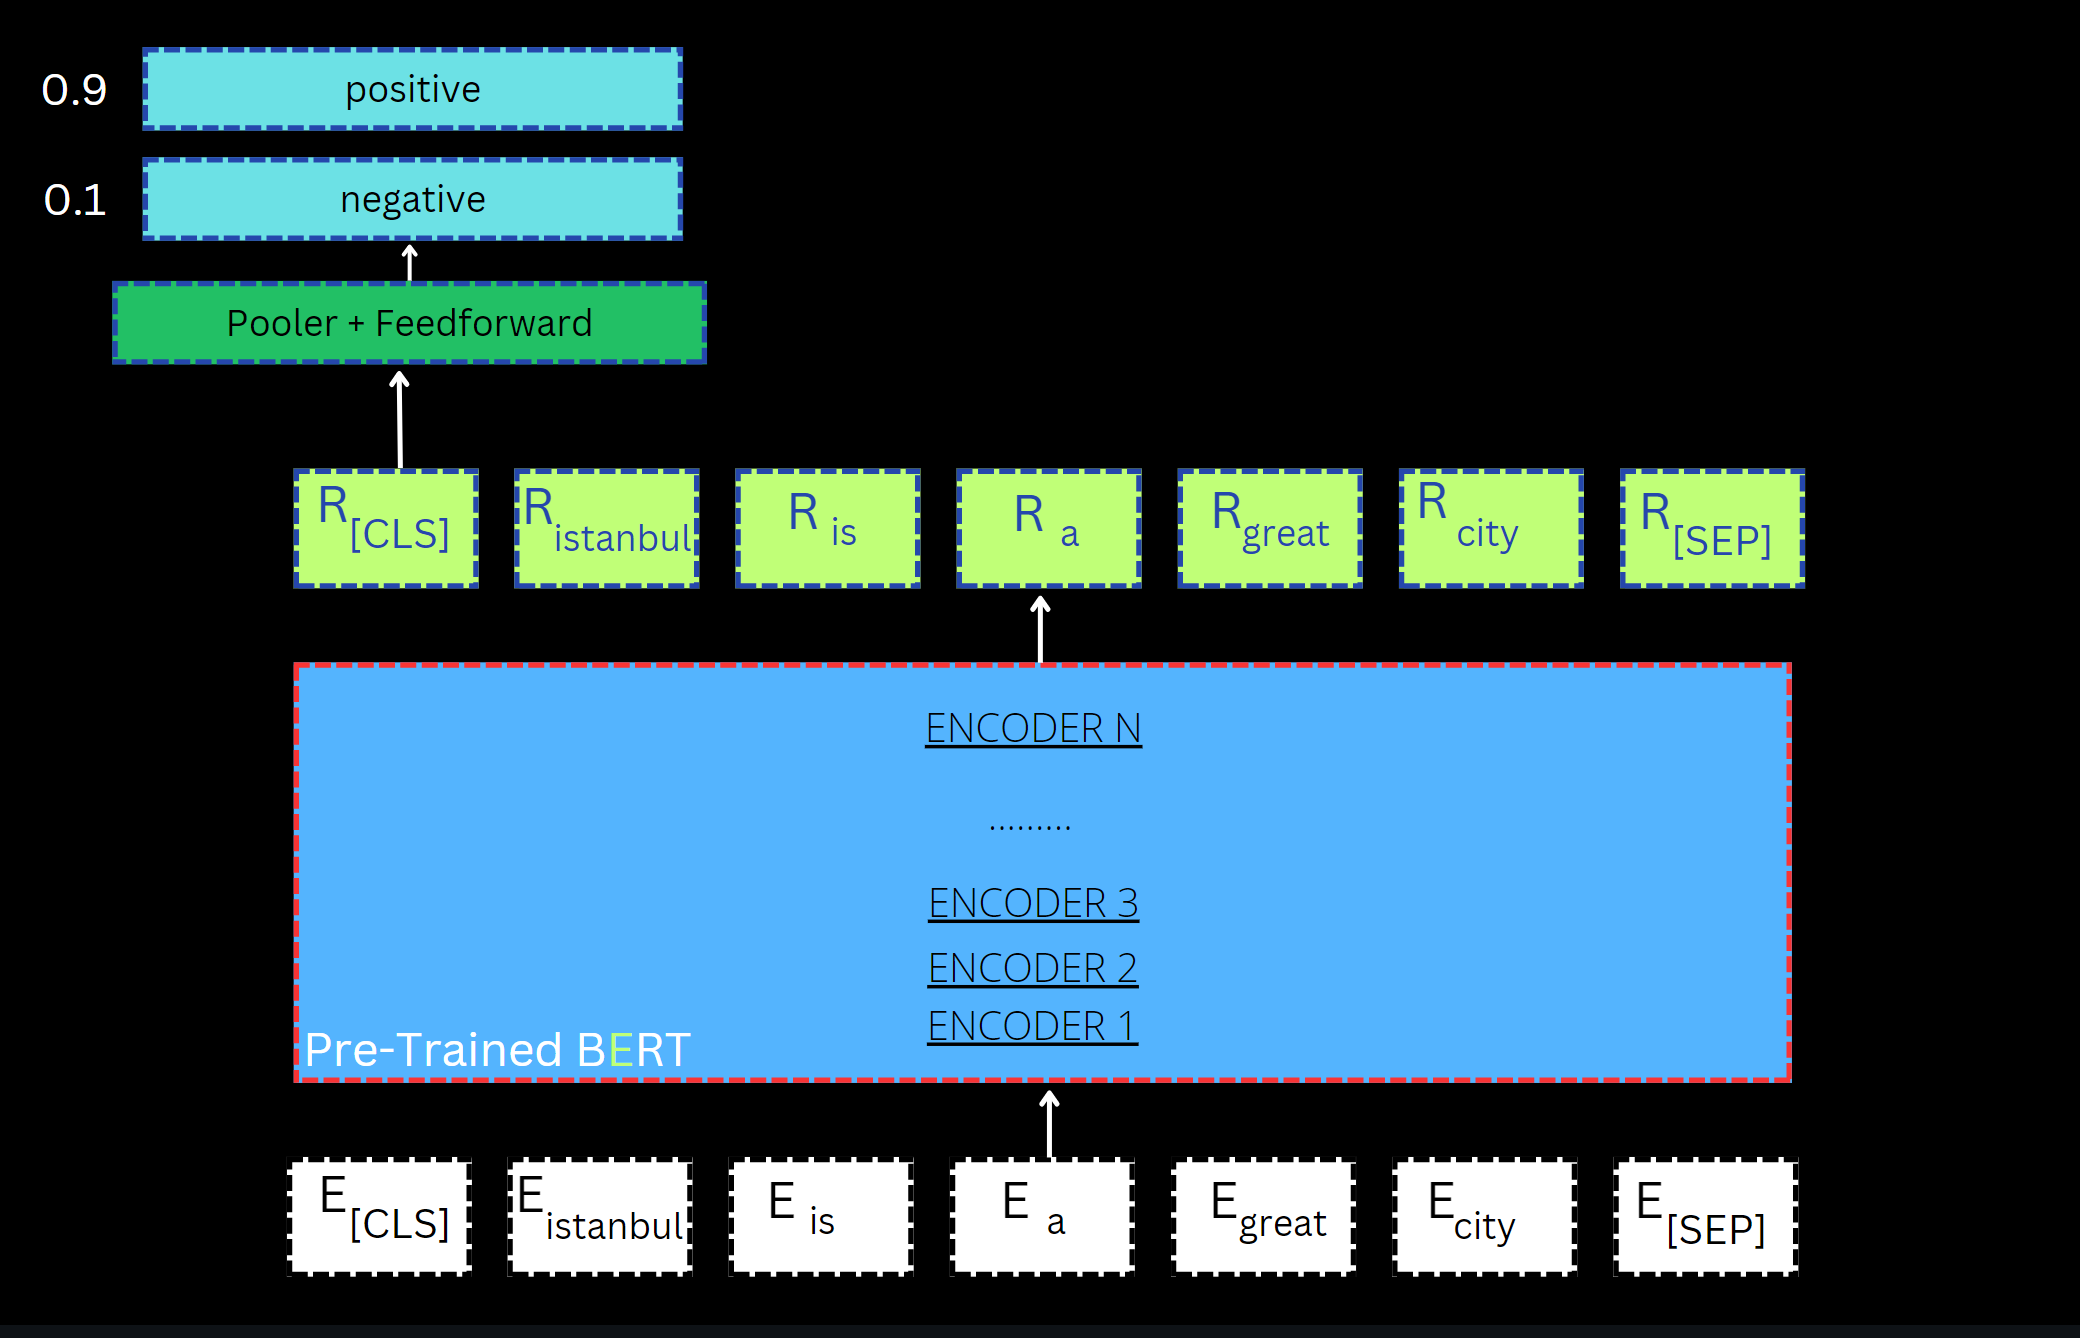

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.4 MB/s eta 0:00:00


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.8 MB/s eta 0:00:00


In [ ]:
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, DistilBertTokenizerFast, DataCollatorWithPadding, pipeline
from datasets import load_metric, Dataset
import numpy as np

In [ ]:
snip_file = open('/content/drive/MyDrive/BERT/Playing_music.txt','rb')

snips_rows = snip_file.readlines()

snips_rows[:20]

[b'\xef\xbb\xbfPlayMusic\n',
 b'data\n',
 b'text I need to hear the \n',
 b'text song\n',
 b'entity music_item\n',
 b'text  \n',
 b'text Aspro Mavro\n',
 b'entity track\n',
 b'text  from \n',
 b'text Bill Szymczyk\n',
 b'entity artist\n',
 b'text  on \n',
 b'text Youtube\n',
 b'entity service\n',
 b'data\n',
 b'text play \n',
 b'text Yo Ho\n',
 b'entity track\n',
 b'text  from \n',
 b'text the new york pops\n']

In [ ]:
utterances = []
tokenized_utterances = []
label_for_utterances = []  # Corrected variable name
sequence_labels = []

utterance = ''  # Initialize the variable

for snip_rows in snips_rows:
    if len(snip_rows) == 2:  # Skip the row with no data
        continue
    if ' ' not in snip_rows.decode():  # We've hit a sequence label
        sequence_labels.append(snip_rows.decode().strip())
        utterances.append(utterance.strip())
        label_for_tokens.append(label_for_utterances)  # Corrected variable name
        utterance = ''
        tokenized_utterance = []  # Corrected variable name
        label_for_utterances = []  # Corrected variable name
        continue
    token, token_label = snip_rows.decode().split(' ')
    token_label = token_label.strip()
    utterance += f'{token}'
    tokenized_utterance.append(token)
    label_for_utterances.append(token_label)


ValueError: ignored

### Experimentation on Preprocessing

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.1 MB/s eta 0:00:00


In [ ]:
pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json

with open('/content/drive/MyDrive/BERT/Raw_data/train_PlayMusic_full.json', encoding='latin-1') as f:
    data_1 = json.load(f)

In [ ]:

with open('/content/drive/MyDrive/BERT/Raw_data/train_AddToPlaylist_full.json', encoding='latin-1') as f:
    data_2 = json.load(f)

In [ ]:

with open('/content/drive/MyDrive/BERT/Raw_data/train_PlayMusic_full.json', encoding='latin-1') as f:
    data_3 = json.load(f)

In [ ]:
# Tokenizing the custom data with its allocated enttity

import torch
from transformers import BertTokenizer

def preprocess_json_data(Json_data):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenized_sentences = []
    label = 'PlayMusic'
    for item in Json_data['PlayMusic']:
        sentence_tokens = [(label, 'O')]
        for subitem in item['data']:
            text = subitem['text']
            entity = subitem.get('entity', 'O')
            tokenized_text = tokenizer.tokenize(text)
            tokenized_entities = [entity] + ['I-' + entity] * (len(tokenized_text) - 1)
            sentence_tokens.extend(list(zip(tokenized_text, tokenized_entities)))
        tokenized_sentences.append(sentence_tokens)
    return label, tokenized_sentences



label, tokenized_data = preprocess_json_data(data)
for sentence in tokenized_data:
    for word, entity in sentence[1:]:
        print(word, entity)
    print(sentence[0])
    print()




Streaming output truncated to the last 5000 lines.
s I-O
new sort
music O
on I-O
pandora service
? O
('PlayMusic', 'O')

play O
music I-O
by I-O
artist I-O
mark artist
ashley I-artist
('PlayMusic', 'O')

play O
the I-O
top sort
maynard artist
james I-artist
keenan I-artist
. O
('PlayMusic', 'O')

i O
want I-O
to I-O
hear I-O
a I-O
top sort
- I-sort
20 I-sort
chant music_item
from O
the I-O
twenties year
('PlayMusic', 'O')

play O
the I-O
most sort
popular I-sort
song music_item
by O
es artist
##pen I-artist
lin I-artist
##d I-artist
('PlayMusic', 'O')

play O
yu album
##au I-album
##ea I-album
by O
rick artist
ross I-artist
('PlayMusic', 'O')

play O
the album
ty I-album
##ran I-album
##ny I-album
of I-album
distance I-album
by O
willy artist
mason I-artist
. O
('PlayMusic', 'O')

play O
a I-O
top sort
song music_item
by O
carson artist
parks I-artist
on O
groove service
shark I-service
('PlayMusic', 'O')

use O
dee service
##zer I-service
to O
play I-O
the I-O
last sort
song music_ite

In [ ]:
tokenized_data[:20]

[[('PlayMusic', 'O'),
  ('i', 'O'),
  ('need', 'I-O'),
  ('to', 'I-O'),
  ('hear', 'I-O'),
  ('the', 'I-O'),
  ('song', 'music_item'),
  ('as', 'track'),
  ('##pro', 'I-track'),
  ('ma', 'I-track'),
  ('##vr', 'I-track'),
  ('##o', 'I-track'),
  ('from', 'O'),
  ('bill', 'artist'),
  ('s', 'I-artist'),
  ('##zy', 'I-artist'),
  ('##mc', 'I-artist'),
  ('##zy', 'I-artist'),
  ('##k', 'I-artist'),
  ('on', 'O'),
  ('youtube', 'service')],
 [('PlayMusic', 'O'),
  ('play', 'O'),
  ('yo', 'track'),
  ('ho', 'I-track'),
  ('from', 'O'),
  ('the', 'artist'),
  ('new', 'I-artist'),
  ('york', 'I-artist'),
  ('pops', 'I-artist'),
  ('on', 'O'),
  ('youtube', 'service')],
 [('PlayMusic', 'O'),
  ('play', 'O'),
  ('some', 'I-O'),
  ('seventies', 'year'),
  ('music', 'O'),
  ('by', 'I-O'),
  ('jan', 'artist'),
  ('##ne', 'I-artist'),
  ('pu', 'I-artist'),
  ('##urt', 'I-artist'),
  ('##inen', 'I-artist'),
  ('on', 'O'),
  ('youtube', 'service'),
  ('.', 'O')],
 [('PlayMusic', 'O'),
  ('play', 'O')

In [ ]:
tokenized_data[:10] 

[[('PlayMusic', 'O'),
  ('i', 'O'),
  ('need', 'I-O'),
  ('to', 'I-O'),
  ('hear', 'I-O'),
  ('the', 'I-O'),
  ('song', 'music_item'),
  ('as', 'track'),
  ('##pro', 'I-track'),
  ('ma', 'I-track'),
  ('##vr', 'I-track'),
  ('##o', 'I-track'),
  ('from', 'O'),
  ('bill', 'artist'),
  ('s', 'I-artist'),
  ('##zy', 'I-artist'),
  ('##mc', 'I-artist'),
  ('##zy', 'I-artist'),
  ('##k', 'I-artist'),
  ('on', 'O'),
  ('youtube', 'service')],
 [('PlayMusic', 'O'),
  ('play', 'O'),
  ('yo', 'track'),
  ('ho', 'I-track'),
  ('from', 'O'),
  ('the', 'artist'),
  ('new', 'I-artist'),
  ('york', 'I-artist'),
  ('pops', 'I-artist'),
  ('on', 'O'),
  ('youtube', 'service')],
 [('PlayMusic', 'O'),
  ('play', 'O'),
  ('some', 'I-O'),
  ('seventies', 'year'),
  ('music', 'O'),
  ('by', 'I-O'),
  ('jan', 'artist'),
  ('##ne', 'I-artist'),
  ('pu', 'I-artist'),
  ('##urt', 'I-artist'),
  ('##inen', 'I-artist'),
  ('on', 'O'),
  ('youtube', 'service'),
  ('.', 'O')],
 [('PlayMusic', 'O'),
  ('play', 'O')

In [ ]:
def get_tokens(tokenized_data):
    tokens = []
    for sentence in tokenized_data:
        sentence_tokens = []
        for word, _ in sentence[1:]:
            sentence_tokens.append(word)
        tokens.append(sentence_tokens)
    return tokens

def get_entities(tokenized_data):
    entities = []
    for sentence in tokenized_data:
        sentence_entities = []
        for _, entity in sentence[1:]:
            sentence_entities.append(entity)
        entities.append(sentence_entities)
    return entities

def get_labels(tokenized_data):
    labels = []
    for sentence in tokenized_data:
        labels.append(sentence[0][0])
    return labels

def get_text(tokenized_data):
    text = []
    for sentence in tokenized_data:
        sentence_text = ' '.join([word for word, _ in sentence[1:]])
        text.append(sentence_text)
    return text

# Usage:
tokens = get_tokens(tokenized_data)
print(tokens[1])

entities = get_entities(tokenized_data)
print(entities[1])

labels = get_labels(tokenized_data)
print(labels[1])

text = get_text(tokenized_data)
print(text[1])


['play', 'yo', 'ho', 'from', 'the', 'new', 'york', 'pops', 'on', 'youtube']
['O', 'track', 'I-track', 'O', 'artist', 'I-artist', 'I-artist', 'I-artist', 'O', 'service']
PlayMusic
play yo ho from the new york pops on youtube


In [ ]:
len(tokens), len(entities), len(labels), len(text)

(2000, 2000, 2000, 2000)

### Preprocessing on MultiCategory Data

In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.5 MB/s eta 0:00:00


In [2]:
pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.3 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json

with open('/content/drive/MyDrive/BERT/Raw_data/train_PlayMusic_full.json', encoding='latin-1') as f:
    data_1 = json.load(f)

In [5]:

with open('/content/drive/MyDrive/BERT/Raw_data/train_AddToPlaylist_full.json', encoding='latin-1') as f:
    data_2 = json.load(f)

In [6]:

with open('/content/drive/MyDrive/BERT/Raw_data/train_BookRestaurant_full.json', encoding='latin-1') as f:
    data_3 = json.load(f)

In [7]:
# Merge the data
merged_data = {}

merged_data.update(data_1)
merged_data.update(data_2)
merged_data.update(data_3)

# Serialize merged data back to JSON string
merged_json = json.dumps(merged_data)

print(merged_json)

{"PlayMusic": [{"data": [{"text": "I need to hear the "}, {"text": "song", "entity": "music_item"}, {"text": " "}, {"text": "Aspro Mavro", "entity": "track"}, {"text": " from "}, {"text": "Bill Szymczyk", "entity": "artist"}, {"text": " on "}, {"text": "Youtube", "entity": "service"}]}, {"data": [{"text": "play "}, {"text": "Yo Ho", "entity": "track"}, {"text": " from "}, {"text": "the new york pops", "entity": "artist"}, {"text": " on "}, {"text": "Youtube", "entity": "service"}]}, {"data": [{"text": "Play some "}, {"text": "seventies", "entity": "year"}, {"text": " music by "}, {"text": "Janne Puurtinen", "entity": "artist"}, {"text": " on "}, {"text": "Youtube", "entity": "service"}, {"text": "."}]}, {"data": [{"text": "play the "}, {"text": "M\u00c3\u00basica Da S\u00c3\u00a9rie De Filmes O Hobbit", "entity": "album"}, {"text": " "}, {"text": "album", "entity": "music_item"}, {"text": " by "}, {"text": "Alex Otaola", "entity": "artist"}]}, {"data": [{"text": "Play "}, {"text": "Mag

In [8]:
# Tokens are allocated in this phase to each sentences

import json
import torch
from transformers import BertTokenizer

def preprocess_json_data(json_data, labels):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenized_data = []

    for label in labels:
        for item in json_data.get(label, []):
            sentence_tokens = [(label, 'O')]
            for subitem in item['data']:
                text = subitem['text']
                entity = subitem.get('entity', 'O')
                tokenized_text = tokenizer.tokenize(text)
                tokenized_entities = [entity] + ['I-' + entity] * (len(tokenized_text) - 1)
                sentence_tokens.extend(list(zip(tokenized_text, tokenized_entities)))
            tokenized_data.append(sentence_tokens)

    return tokenized_data

# Deserialize merged JSON data back to dictionary
merged_data = json.loads(merged_json)

labels = ['PlayMusic', 'BookRestaurant', 'AddToPlaylist']
tokenized_data = preprocess_json_data(merged_data, labels)

for sentence in tokenized_data:
    for word, entity in sentence[1:]:
        print(word, entity)
    print(sentence[0])
    print()


Streaming output truncated to the last 5000 lines.
rock I-playlist
de I-playlist
es I-playlist
##pa I-playlist
##a I-playlist
##± I-playlist
##a I-playlist
play O
##list I-O
. I-O
('AddToPlaylist', 'O')

please O
add I-O
this I-O
track music_item
to O
my playlist_owner
de playlist
cam I-playlist
##ino I-playlist
play O
##list I-O
('AddToPlaylist', 'O')

add O
ka entity_name
##rus I-entity_name
##elle I-entity_name
##n I-entity_name
to O
jazz playlist
brasil I-playlist
##eiro I-playlist
('AddToPlaylist', 'O')

add O
this I-O
song music_item
by O
chi artist
##ek I-artist
##o I-artist
och I-artist
##i I-artist
to O
the I-O
drum playlist
& I-playlist
breaks I-playlist
play O
##list I-O
('AddToPlaylist', 'O')

add O
this I-O
track music_item
to O
the I-O
sin playlist
ti I-playlist
play O
##list I-O
('AddToPlaylist', 'O')

add O
roe artist
##l I-artist
van I-artist
ve I-artist
##lz I-artist
##en I-artist
to O
the I-O
night playlist
play O
##list I-O
. I-O
('AddToPlaylist', 'O')

add O
artist

In [9]:
# For functions are allocated:
# 1. Consists of Tokens of the Sentence
# 2. Consists of Entity that represents the tokens
# 3. Consists The label of the sentence
# 4. Consist of the whole sentence


def get_tokens(tokenized_data):
    tokens = []
    for sentence in tokenized_data:
        sentence_tokens = []
        for word, _ in sentence[1:]:
            sentence_tokens.append(word)
        tokens.append(sentence_tokens)
    return tokens

def get_entities(tokenized_data):
    entities = []
    for sentence in tokenized_data:
        sentence_entities = []
        for _, entity in sentence[1:]:
            sentence_entities.append(entity)
        entities.append(sentence_entities)
    return entities

def get_labels(tokenized_data):
    labels = []
    for sentence in tokenized_data:
        labels.append(sentence[0][0])
    return labels

def get_text(tokenized_data):
    text = []
    for sentence in tokenized_data:
        sentence_text = ' '.join([word for word, _ in sentence[1:]])
        text.append(sentence_text)
    return text

# Usage:
tokenized_utterances = get_tokens(tokenized_data)
print(tokenized_utterances[1])

labels_for_tokens = get_entities(tokenized_data)
print(labels_for_tokens[1])

sequence_labels = get_labels(tokenized_data)
print(sequence_labels[1])

utterances = get_text(tokenized_data)
print(utterances[1])


['play', 'yo', 'ho', 'from', 'the', 'new', 'york', 'pops', 'on', 'youtube']
['O', 'track', 'I-track', 'O', 'artist', 'I-artist', 'I-artist', 'I-artist', 'O', 'service']
PlayMusic
play yo ho from the new york pops on youtube


In [13]:
# Usage:
tokenized_utterances = get_tokens(tokenized_data)
print(tokenized_utterances[1])

sequence_labels = get_labels(tokenized_data)
print(sequence_labels[1])

utterances = get_text(tokenized_data)
print(utterances[1])

labels_for_tokens = get_entities(tokenized_data)
print(labels_for_tokens[1])

['play', 'yo', 'ho', 'from', 'the', 'new', 'york', 'pops', 'on', 'youtube']
PlayMusic
play yo ho from the new york pops on youtube
['O', 'track', 'I-track', 'O', 'artist', 'I-artist', 'I-artist', 'I-artist', 'O', 'service']


In [10]:
tokenized_utterances

[['i',
  'need',
  'to',
  'hear',
  'the',
  'song',
  'as',
  '##pro',
  'ma',
  '##vr',
  '##o',
  'from',
  'bill',
  's',
  '##zy',
  '##mc',
  '##zy',
  '##k',
  'on',
  'youtube'],
 ['play', 'yo', 'ho', 'from', 'the', 'new', 'york', 'pops', 'on', 'youtube'],
 ['play',
  'some',
  'seventies',
  'music',
  'by',
  'jan',
  '##ne',
  'pu',
  '##urt',
  '##inen',
  'on',
  'youtube',
  '.'],
 ['play',
  'the',
  'ma',
  '##º',
  '##sic',
  '##a',
  'da',
  'sa',
  '##©',
  '##rie',
  'de',
  'film',
  '##es',
  'o',
  'ho',
  '##bb',
  '##it',
  'album',
  'by',
  'alex',
  'ot',
  '##ao',
  '##la'],
 ['play', 'magic', 'sam', 'from', 'the', 'thirties'],
 ['play', 'the', 'soft', 'parade', '.'],
 ['play', 'music', 'by', 'blow', '##fly', 'from', 'the', 'seventies'],
 ['play', 'jeff', 'pi', '##lson', 'on', 'youtube'],
 ['play',
  'a',
  'tune',
  'by',
  'sy',
  '##ree',
  '##ta',
  'wright',
  'from',
  'twenties',
  'from',
  'the',
  'top'],
 ['please',
  'play',
  'me',
  'jerry',


In [11]:
unique_sequence_labels = list(set(sequence_labels))
unique_sequence_labels

['AddToPlaylist', 'PlayMusic', 'BookRestaurant']

In [12]:
sequence_labels = [unique_sequence_labels.index(l) for l in sequence_labels]

print(f"There are {len(unique_sequence_labels)} unique sequnece labels")

There are 3 unique sequnece labels


In [15]:
from  functools import reduce

unique_token_labels = list(set(reduce(lambda x,y: x+y, labels_for_tokens)))
labels_for_tokens = [[unique_token_labels.index(__) for __ in l] for l in labels_for_tokens]

print(f"There are {len(unique_token_labels)} unique token labels")

There are 49 unique token labels


In [17]:
print(tokenized_utterances[9])
print(labels_for_tokens[9])
print([unique_token_labels[l] for l in labels_for_tokens[9]])
print(utterances[9])
print(sequence_labels[9])
print(unique_sequence_labels[sequence_labels[9]])

['please', 'play', 'me', 'jerry', 'lee', 'lewis', "'", 's', 'if', 'you', 'say', 'so', 'track', '.']
[30, 46, 46, 19, 37, 37, 30, 46, 15, 6, 6, 6, 13, 30]
['O', 'I-O', 'I-O', 'artist', 'I-artist', 'I-artist', 'O', 'I-O', 'track', 'I-track', 'I-track', 'I-track', 'music_item', 'O']
please play me jerry lee lewis ' s if you say so track .
PlayMusic


TypeError: ignored

In [18]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.3 MB/s eta 0:00:00


In [19]:
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, DistilBertTokenizerFast, DataCollatorWithPadding, pipeline
from datasets import load_metric, Dataset
import numpy as np

In [20]:
snips_dataset = Dataset.from_dict (                                             # hold data for both the sequence and token classification
    dict(
        utterance=utterances,
        label=sequence_labels,
        tokens=tokenized_utterances,
        token_labels=labels_for_tokens
    )
  
)
snips_dataset = snips_dataset.train_test_split(test_size=0.2)

### Experimenting to find the solution

In [22]:
snips_dataset['train'][0]

{'utterance': 'book a rest ##au ##tan ##t in north dakota at a bis ##tro that is indoor',
 'label': 'BookRestaurant',
 'tokens': ['book',
  'a',
  'rest',
  '##au',
  '##tan',
  '##t',
  'in',
  'north',
  'dakota',
  'at',
  'a',
  'bis',
  '##tro',
  'that',
  'is',
  'indoor'],
 'token_labels': [30,
  46,
  46,
  46,
  46,
  46,
  46,
  21,
  1,
  30,
  46,
  5,
  25,
  30,
  46,
  40]}

### Continue with the Preproces

In [23]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [24]:
# simple funciton to batch tokenize utterances with truncation

def preprocess_function(examples):
  return tokenizer(examples['utterance'], truncation=True)

In [25]:
seq_clf_tokenized_snips = snips_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/4732 [00:00<?, ? examples/s]

Map:   0%|          | 0/1183 [00:00<?, ? examples/s]

In [26]:
seq_clf_tokenized_snips['train'][0]

{'utterance': 'book a rest ##au ##tan ##t in north dakota at a bis ##tro that is indoor',
 'label': 'BookRestaurant',
 'tokens': ['book',
  'a',
  'rest',
  '##au',
  '##tan',
  '##t',
  'in',
  'north',
  'dakota',
  'at',
  'a',
  'bis',
  '##tro',
  'that',
  'is',
  'indoor'],
 'token_labels': [30,
  46,
  46,
  46,
  46,
  46,
  46,
  21,
  1,
  30,
  46,
  5,
  25,
  30,
  46,
  40],
 'input_ids': [101,
  2338,
  1037,
  2717,
  1001,
  1001,
  8740,
  1001,
  1001,
  9092,
  1001,
  1001,
  1056,
  1999,
  2167,
  7734,
  2012,
  1037,
  20377,
  1001,
  1001,
  19817,
  2080,
  2008,
  2003,
  7169,
  102],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

## Sequnce Classification with Bert

In [27]:
# DataCollatorWithPadding creates batch of data. It also dynamically pads text to the
# length of the longest element in the batch, making them all the same length.
# it's possible to pad your text in the tokenizer function with padding=True, dynamic padding is more efficient.

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Data Collator will pad data so that all examples are the same input length
# Attention mask is how we ignore attention scores for padding tokens

In [28]:
sequence_clf_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(unique_sequence_labels), 
)

# set as index  -> label dictionary
sequence_clf_model.config.id2label = {i: l for i, l in enumerate(unique_sequence_labels)}

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_clas

In [29]:
sequence_clf_model.config.id2label[0]

'AddToPlaylist'

In [30]:
metric = load_metric('accuracy')

def compute_metrics(eval_pred):                                                 # custom method to take in logits and calculate accuracy of the eval set
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, refrences=labels)

<ipython-input-30-4abc10601345>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('accuracy')


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!pip install datasets transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2


In [34]:
epochs = 2

training_args = TrainingArguments(
    output_dir ="./snips_clf/results",
    num_train_epochs=epochs,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    # some deep learning parameters that the Trainer is able to take in
    warmup_steps = len(seq_clf_tokenized_snips['train']) // 5,                      # number of warmup steps for learning rate schedular,
    weight_decay = 0.05,


    logging_steps=1,
    log_level='info',
    evaluation_strategy='epoch',
    save_strategy='epoch',
)


# Define the trainer:

trainer = Trainer(
    model=sequence_clf_model,
    args=training_args,
    train_dataset=seq_clf_tokenized_snips['train'],
    eval_dataset=seq_clf_tokenized_snips['test'],
    compute_metrics=compute_metrics,
    data_collator=data_collator
)




ImportError: ignored

In [32]:
trainer.evaluate()

NameError: ignored